IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      40.0 -0.009213   0.011797    2.276711   0.108864         60.0   
1      54.0 -0.055761   0.026456   -0.921826   0.171755          0.0   
2      46.0 -0.027625   0.007464   -0.598319   0.090602         87.0   
3      38.0 -0.042859   0.026228    1.596519   0.167324         76.0   
4      22.0  0.006293   0.007572   -0.460406   0.087127          0.0   
...     ...       ...        ...         ...        ...          ...   
1344   45.0 -0.064275   0.011722    0.438322   0.125791          0.0   
1345   78.0 -0.053718   0.025688   -0.913435   0.168859          0.0   
1346   65.0 -0.043452   0.024697    1.857420   0.162866         96.0   
1347   50.0 -0.030890   0.009984    2.064351   0.104467         66.0   
1348   28.0 -0.024614   0.009755    2.401339   0.101661         82.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            79.0    5.643957    2.456770  0.061928  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.009213   0.011797    2.276711   0.108864         60.0         79.0   
1    -0.055761   0.026456   -0.921826   0.171755          0.0         79.0   
2    -0.027625   0.007464   -0.598319   0.090602         87.0         66.0   
3    -0.042859   0.026228    1.596519   0.167324         76.0          0.0   
4     0.006293   0.007572   -0.460406   0.087127          0.0         88.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.064275   0.011722    0.438322   0.125791          0.0         70.0   
1345 -0.053718   0.025688   -0.913435   0.168859          0.0         85.0   
1346 -0.043452   0.024697    1.857420   0.162866         96.0          0.0   
1347 -0.030890   0.009984    2.064351   0.104467         66.0         88.0   
1348 -0.024614   0.009755    2.401339   0.101661         82.0         62.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.026019   0.007281    -0.56443   0.089102         99.0         76.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    3.757601    3.344457  0.047093   0.012533  ...      12901.435451   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.132239          0.268136          -0.647676          3.174646   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               138.0               136.0          28.158215   

     amp2(Curr(ESC_5))  Guasto  
340           7.120036       1  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.009213   0.011797    2.276711   0.108864         60.0         79.0   
1    -0.055761   0.026456   -0.921826   0.171755          0.0         79.0   
2    -0.027625   0.007464   -0.598319   0.090602         87.0         66.0   
3    -0.042859   0.026228    1.596519   0.167324         76.0          0.0   
4     0.006293   0.007572   -0.460406   0.087127          0.0         88.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.064275   0.011722    0.438322   0.125791          0.0         70.0   
1345 -0.053718   0.025688   -0.913435   0.168859          0.0         85.0   
1346 -0.043452   0.024697    1.857420   0.162866         96.0          0.0   
1347 -0.030890   0.009984    2.064351   0.104467         66.0         88.0   
1348 -0.024614   0.009755    2.401339   0.101661         82.0         62.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.009213   0.011797    2.276711   0.108864    60.000000    79.000000   
1    -0.055761   0.026456   -0.921826   0.171755     0.000000    79.000000   
2    -0.027625   0.007464   -0.598319   0.090602    87.000000    66.000000   
3    -0.042859   0.026228    1.596519   0.167324    76.000000     0.000000   
4     0.006293   0.007572   -0.460406   0.087127     0.000000    88.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.121851   0.038120   -0.363683   0.229938    84.100573    63.371920   
1619 -0.035682   0.010103    1.877255   0.106548    73.995777    98.992761   
1620 -0.024308   0.007098   -0.529024   0.087579   100.078269    75.617404   
1621  0.001525   0.011052    3.210181   0.104996    63.024684    83.829621   
1622 -0.140761   0.039795   -1.477516   0.243945    99.468481    98.468481   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=45)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=45, score_func=<function f_regression at 0x0000014AADAD1120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False  True False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False  True False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.341380
28         freq1(AccX)  3.515897
12         freq1(GyrY)  3.176586
11           RMS(GyrY)  2.800835
9            var(GyrY)  2.661493
153   kurt(RPM(ESC_5))  2.623876
93   freq2(RPM(ESC_1))  2.612109
92   freq1(RPM(ESC_1))  2.604537
14          amp1(GyrY)  2.402789
159   var(Curr(ESC_5))  2.224443
104     <>(RPM(ESC_2))  1.927664
8             <>(GyrY)  1.863692
152    var(RPM(ESC_5))  1.736753
78    amp1(RPM(ESC_0))  1.725365
22          amp1(GyrZ)  1.617020
107    RMS(RPM(ESC_2))  1.616701
32            <>(AccY)  1.588022
62         amp1(Pitch)  1.214305
30          amp1(AccX)  1.110513
76   freq1(RPM(ESC_0))  1.095955
17           var(GyrZ)  1.029993
80     <>(Curr(ESC_0))  0.997360
4          freq1(GyrX)  0.949874
77   freq2(RPM(ESC_0))  0.924383
19           RMS(GyrZ)  0.923735
57          var(Pitch)  0.882657
156   amp1(RPM(ESC_5))  0.795555
81    var(Curr(ESC_0))  0.670945
15          amp2(GyrY)  0.648221
97    var(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.009213   0.011797    60.000000  0.061928   0.011041   0.121853   
1    -0.055761   0.026456     0.000000 -0.017031   0.007850   0.090116   
2    -0.027625   0.007464    87.000000  0.048141   0.012517   0.121669   
3    -0.042859   0.026228    76.000000 -0.007580   0.009408   0.097164   
4     0.006293   0.007572     0.000000  0.017776   0.005755   0.077814   
...        ...        ...          ...       ...        ...        ...   
1618 -0.121851   0.038120    84.100573  0.040076   0.010351   0.109231   
1619 -0.035682   0.010103    73.995777 -0.009903   0.005930   0.077553   
1620 -0.024308   0.007098   100.078269  0.045911   0.012526   0.120838   
1621  0.001525   0.011052    63.024684  0.066295   0.011570   0.126225   
1622 -0.140761   0.039795    99.468481  0.026689   0.008756   0.097191   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
0       96.000000    2.611545  

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.026019   0.007281         99.0  0.047093   0.012533   0.121321   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
340        113.0   19.328535      1.7608   0.008147  ...               71.0   

     freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  var(RPM(ESC_5))  \
340               69.0         -0.469199          -0.336531     1.152163e+06   

     kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  amp2(RPM(ESC_5))  <>(Curr(ESC_5))  \
340         -0.256325      14797.671094      12901.435451         3.132239   

     var(Curr(ESC_5))  
340          0.268136  

[1 rows x 45 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
0    -0.009213   0.011797    60.000000  0.061928   0.004927   -1.392907   
1    -0.055761   0.026456     0.000000 -0.017031   0.036864    0.764138   
2    -0.027625   0.007464    87.000000  0.048141   0.008107   -1.362719   
3    -0.042859   0.026228    76.000000 -0.007580   0.007356   -1.257154   
4     0.006293   0.007572     0.000000  0.017776   0.005907   -0.911088   
...        ...        ...          ...       ...        ...         ...   
1618 -0.121851   0.038120    84.100573  0.040076   0.004773   -1.239358   
1619 -0.035682   0.010103    73.995777 -0.009903   0.004255   -1.229584   
1620 -0.024308   0.007098   100.078269  0.045911   0.008199   -1.370226   
1621  0.001525   0.011052    63.024684  0.066295   0.004417   -1.404069   
1622 -0.140761   0.039795    99.468481  0.026689   0.005533   -1.165199   

      RMS(GyrZ)  amp1(GyrZ)  amp1(AccZ)  var(Curr(ESC_1))  amp2(Curr(ESC_1))  \
0      0.108966    

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
340 -0.026019   0.007281         99.0  0.047093   0.008147   -1.365545   

     RMS(GyrZ)  amp1(GyrZ)  amp1(AccZ)  var(Curr(ESC_1))  amp2(Curr(ESC_1))  \
340   0.149192    3.626773  184.377542          0.515628          14.777363   

     <>(RPM(ESC_2))  var(Curr(ESC_2))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  \
340     5409.671756          0.441737         -0.469199          -0.336531   

     amp2(RPM(ESC_5))  
340      12901.435451  


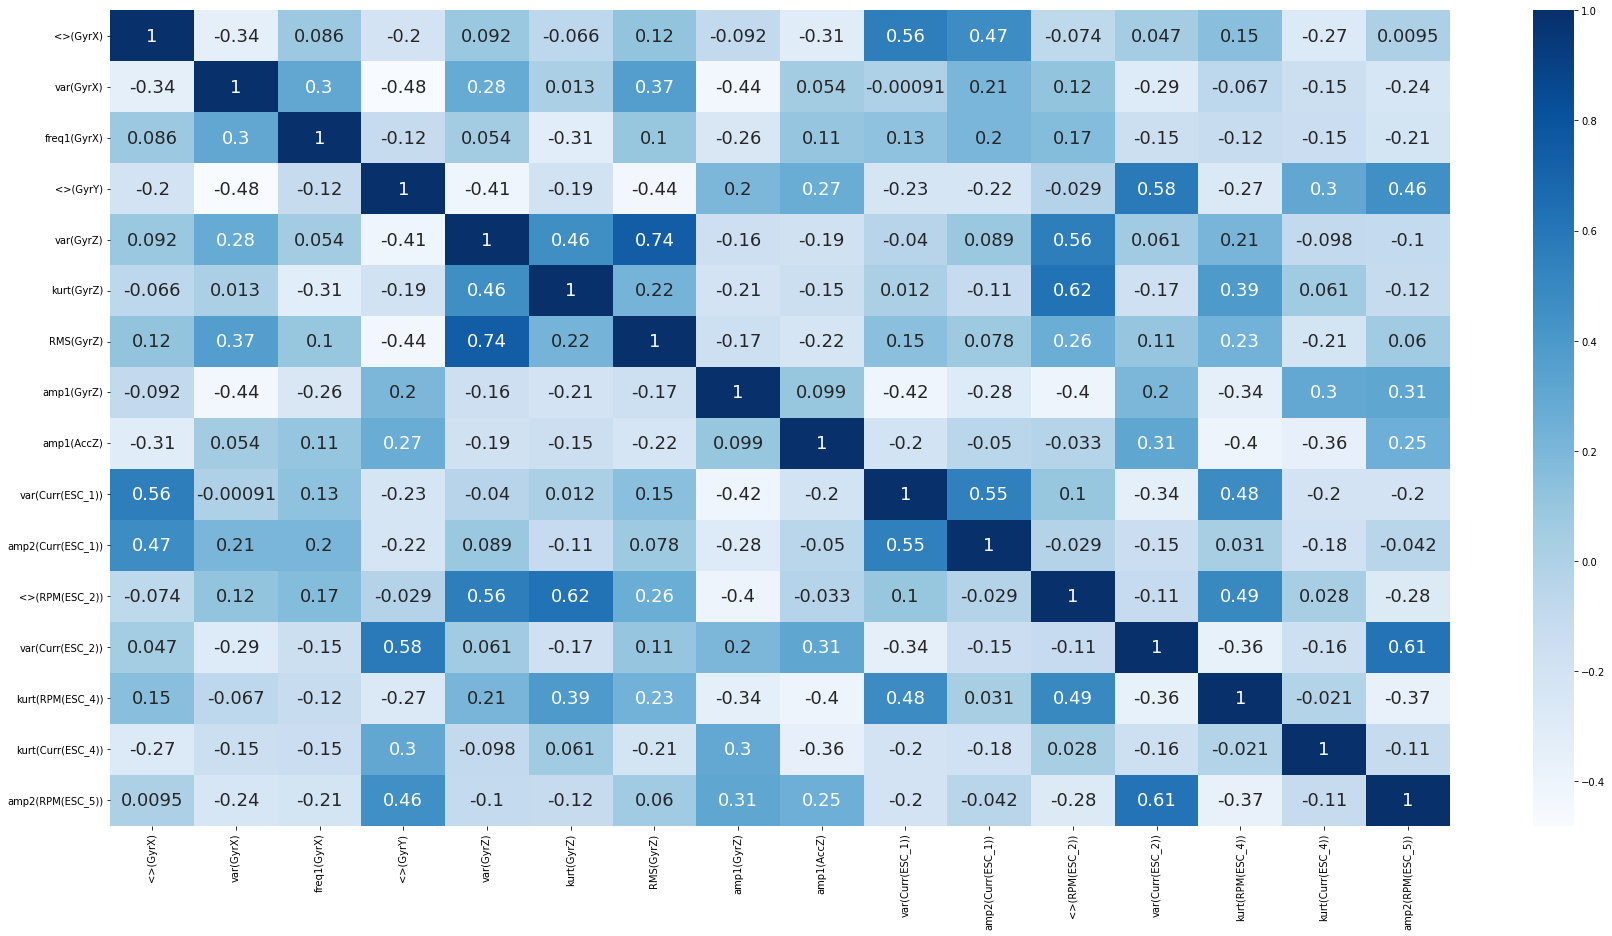

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 16)
(325, 16)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.64230769 0.73076923 0.74230769 0.75675676 0.72200772]
Accuracy: 0.78 	 ---> LogisticRegression 
Test: 1    1
Name: Guasto_test, dtype: int64


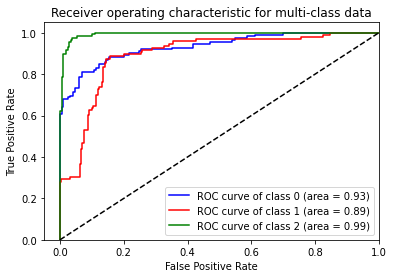

----------------------------------------------------
Cross-Validation: [0.48846154 0.55384615 0.49230769 0.54440154 0.49420849]
Accuracy: 0.49 	 ---> SVC 
Test: 1    1
Name: Guasto_test, dtype: int64


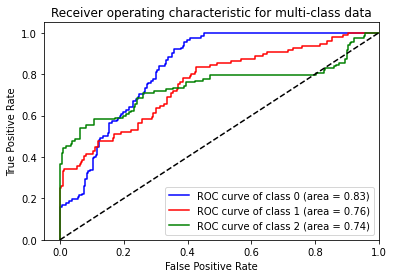

----------------------------------------------------
Cross-Validation: [0.48076923 0.77692308 0.76923077 0.59073359 0.58687259]
Accuracy: 0.65 	 ---> MLPClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


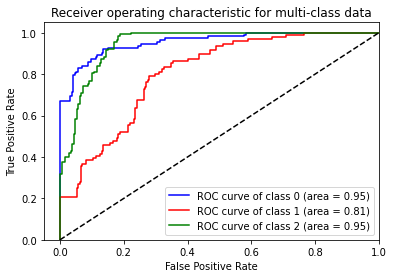

----------------------------------------------------
Cross-Validation: [0.55769231 0.51923077 0.52692308 0.64092664 0.53281853]
Accuracy: 0.58 	 ---> SGDClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


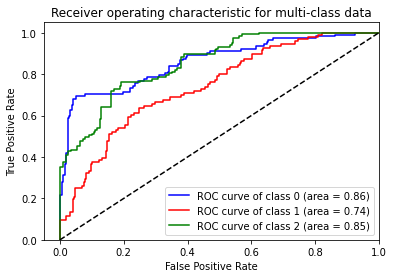

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

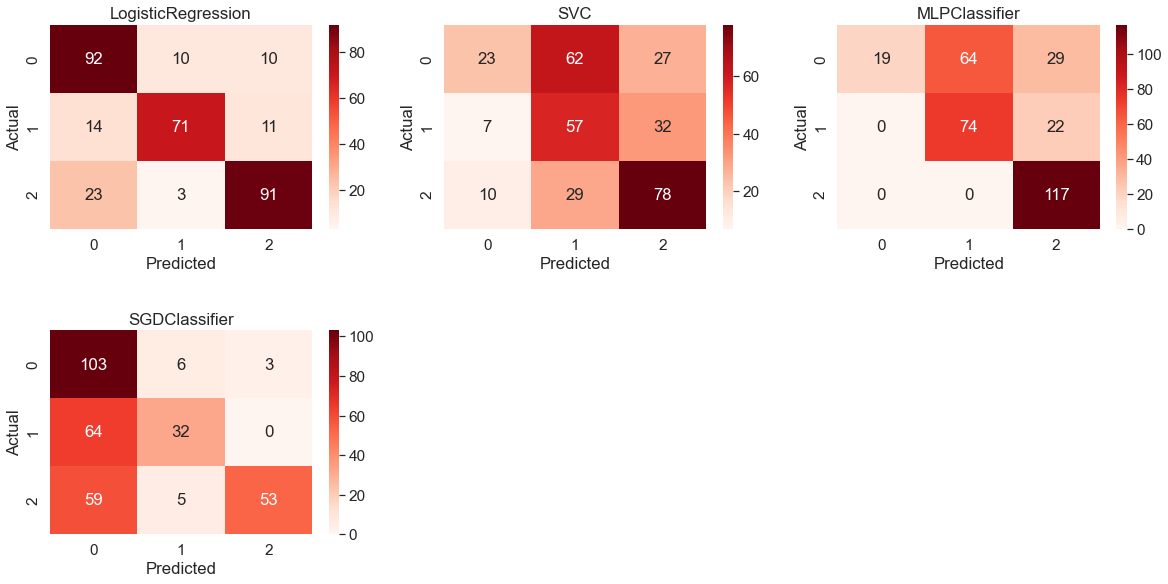

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation score

Text(0.5, 1.0, 'Cross validation scores')

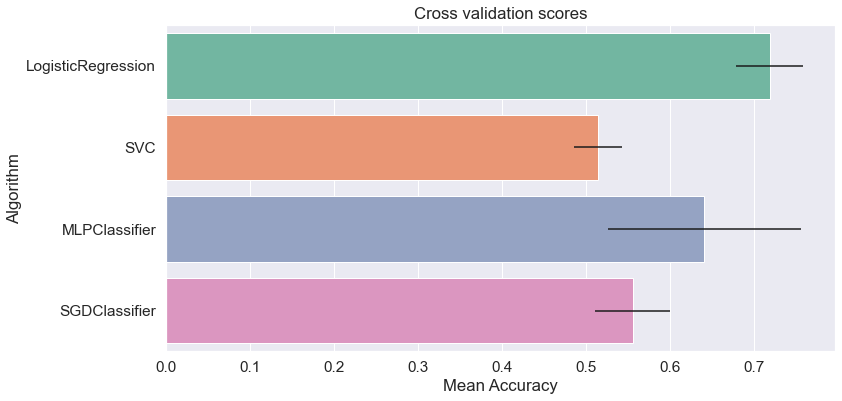

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       112
           1       0.85      0.74      0.79        96
           2       0.81      0.78      0.79       117

    accuracy                           0.78       325
   macro avg       0.79      0.78      0.78       325
weighted avg       0.79      0.78      0.78       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.21      0.30       112
           1       0.39      0.59      0.47        96
           2       0.57      0.67      0.61       117

    accuracy                           0.49       325
   macro avg       0.51      0.49      0.46       325
weighted avg       0.52      0.49      0.46       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29       112
           1       0.54